# Milestone 1 - Notebook 01 Submission

## What this notebook does:
- Import the tmdbsimple package

### Part 1
- Obtain genre data for favorite movie from TMDB and IMDB
- Retrieves the TMDB movie poster for favorite movie
- Obtain list of 20 most popular movies of 2016
- Create dataframe with relevant characteristics of these movies
- Create dataframe of genre per movie
- Create and visualize dataframe of genre relative co-occurrance

### Part 2
- Repeat exploration for another movie
- Explore the multiple genre problem

### Part 3
- Additional visualizations
- Possible questions to answer
- Additional notes

## Notes:
- Working with tmdbsimple wrapper to obtain data (Check https://github.com/celiao/tmdbsimple/)

In [3]:
# Note: be sure to launch Python as root with command: 
# sudo ipython notebook
# Also, need to previously run command: 
# sudo apt-get install python-imaging-tk
# And this might be helpful: 
# sudo apt-get install build-essential libssl-dev libffi-dev python-dev
#!pip install --upgrade pip
#!pip install cryptography
#!pip install tmdbsimple
#!pip install Image
#!pip install IMDbPY

In [4]:
# Import tmdbsimple wrapper
from collections import OrderedDict
from imdb import IMDb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import pandas as pd
from PIL import Image
import tmdbsimple as tm
import urllib

%matplotlib inline
tm.API_KEY = '8c7d0bb785cb396ff84c3392e3baa7f9'
im = IMDb()

# Part I 

## Explore TMDb through your favorite movie

In [5]:
# Find Movie Code
search = tm.Search()
response = search.movie(query='Django Unchained')
for s in search.results:
    print(s['title'], s['id'])
    p = s['id']
    
# Obtain Genres for Django
django = tm.Movies(p).info()
print 'Genres from TMDB'
print django['genres'][0]['name']
print django['genres'][1]['name']

(u'Django Unchained', 68718)
Genres from TMDB
Drama
Western


In [7]:
# Obtain list of genre names from TMDb
genre = tm.Genres()
response = genre.list()
g_codes = []
g_names = []
for s in genre.genres:
    g_codes = [g_codes, s['id']]
    g_names = [g_names, s['name']]
    
# Use the IMDB id from TMDB to get IMDb data
django_id = django['imdb_id'][2:]
django_imdb = im.get_movie('1853728')
django_genres_imdb = django_imdb['genres']
print 'Genres from IMDB'
print django_genres_imdb

Genres from IMDB
[u'Drama', u'Western']


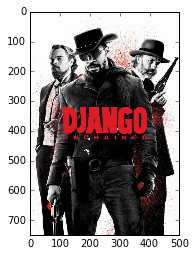

In [8]:
# Download poster
django_poster = 'https://image.tmdb.org/t/p/w500/'+ django['poster_path']
urllib.urlretrieve(django_poster,'django.jpg')
django_image = Image.open('django.jpg')
imshow(np.asarray(django_image))

## Explore TMDb through most popular movies

In [9]:
# Obtain most popular movies in 2016
discover = tm.Discover()
response = discover.movie(page = 1, year = 2016, 
                          sort_by = 'popularity.desc')
t = []
i = []
p = []
g = []
g_name = []
for s in discover.results:
    t.append(s['title'])
    i.append(s['id'])
    p.append(s['popularity'])
    g.append(s['genre_ids'])

    temp = []
    for k in s['genre_ids']:
        for j in genre.genres:
            if k == j['id']:
                temp.append(j['name'])
    g_name.append([temp])

In [10]:
# Produce Dataframe
import pandas as pd
data = pd.DataFrame(
    {'title': t,
     'id': i,
     'popularity': p,
     'genre_codes': g,
     'genre_names': g_name
    })

In [11]:
# Produce Movie/Genre Matrix
from sklearn.feature_extraction.text import CountVectorizer as CVect
data['genre_str'] = ''
for i in range(len(data)):
    data['genre_str'][i] = str(data['genre_names'][i])
vect = CVect()
corpus = data['genre_str'].values
x = vect.fit_transform(corpus)
x = x.toarray()
n = vect.get_feature_names()
l = len(n)
matrix = pd.DataFrame({})
for i in range(l):
    matrix[str(n[i])] = x[:,i]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# Produce Genre/Genre Matrices of Relative Co-ocurrences
xt = np.transpose(x)
X = np.matmul(xt, x)

from __future__ import division
Xr = np.zeros((15,15))
Xc = np.zeros((15,15))
for i in range(15):
    for j in range(15):
        Xr[i,j] = X[i,j]/X[i,i]
        Xc[i,j] = X[i,j]/X[j,j]
Xt = (Xr + Xc) / float(2)

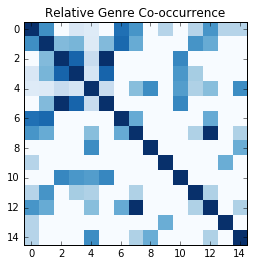

In [13]:
# Visualize Genre/Genre Matrix of Relative Co-occurrence 
%matplotlib inline

plt.imshow(Xt, cmap='Blues', interpolation='nearest')
plt.title('Relative Genre Co-occurrence')
plt.show()

Highest relative co-occurrences of genres in 20 most popular movies of 2016 occur between:

- Science and Fiction
- Family and Animation
- Comedy and Animation
- Comedy and Family

# Part II: Explore the multi-genre problem

## First, show all search results for "The Matrix"

In [14]:
# Find Movie Code
search = tm.Search()
response = search.movie(query='The Matrix')
for s in search.results:
    print(s['title'], s['id'])
    p = s['id']

(u'The Matrix', 603)
(u'The Matrix Reloaded', 604)
(u'The Matrix Revolutions', 605)
(u'The Matrix Revisited', 14543)
(u'The Matrix Recalibrated', 221495)
(u'Sex and the Matrix', 344225)
(u'The Living Matrix', 119742)
(u'The Roots of the Matrix', 274866)
(u'The Zionist Matrix of Power', 408912)
(u'The Happiness Matrix: Creativity and Personal Mastery', 323256)
(u'The American Matrix - Age Of Deception', 26214)
(u'David Icke - Secrets of the Matrix', 371610)
(u'Return to Source: The Philosophy of The Matrix', 174615)
(u'Adventures in Odyssey: Escape from the Forbidden Matrix', 268477)
(u'The Animatrix', 55931)
(u'The Transformers: The Movie', 1857)


## Next, display all available data for The Matrix, including poster and genres

In [15]:
# Display all data for The Matrix
thematrix = tm.Movies(search.results[0]['id']).info()
thematrix

{u'adult': False,
 u'backdrop_path': u'/7u3pxc0K1wx32IleAkLv78MKgrw.jpg',
 u'belongs_to_collection': {u'backdrop_path': u'/RhUxjzNojIJsdZSYTn0CQvdKsn.jpg',
  u'id': 2344,
  u'name': u'The Matrix Collection',
  u'poster_path': u'/lh4aGpd3U9rm9B8Oqr6CUgQLtZL.jpg'},
 u'budget': 63000000,
 u'genres': [{u'id': 28, u'name': u'Action'},
  {u'id': 878, u'name': u'Science Fiction'}],
 u'homepage': u'http://www.warnerbros.com/matrix',
 u'id': 603,
 u'imdb_id': u'tt0133093',
 u'original_language': u'en',
 u'original_title': u'The Matrix',
 u'overview': u'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 u'popularity': 7.063497,
 u'poster_path': u'/lZpWprJqbIFpEV5uoHfoK0KCnTW.jpg',
 u'production_companies': [{u'id': 79, u'name': u'Village Roadshow Pictures'},
  {u'id': 372, u'name': u'Groucho II Film Partnership'},
  {u'id': 1885, u'name': u'Silver Pictures'},
  {u

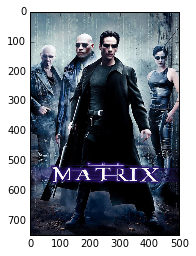

In [16]:
# Display poster for The Matrix
thematrix_poster = 'https://image.tmdb.org/t/p/w500/'+ thematrix['poster_path']
urllib.urlretrieve(thematrix_poster,'thematrix.jpg')
thematrix_image = Image.open('thematrix.jpg')
imshow(np.asarray(thematrix_image))
# thematrix_image.Show()

In [17]:
# Show comparison of genres in TMDB and IMDB
print "Genres for The Matrix, according to TMDB: "
for g in range(len(thematrix['genres'])):
    print str(g+1) + ". " + thematrix['genres'][g]['name']
    
# Use the IMDB id from TMDB to get IMDB data
thematrix_id = thematrix['imdb_id'][2:]
thematrix_imdb = im.get_movie(thematrix_id)
thematrix_genres_imdb = thematrix_imdb['genres']
print "\nGenres for The Matrix, according to IMDB: "
for g in range(len(thematrix_genres_imdb)):
    print str(g+1) + ". " + thematrix_genres_imdb[g]

Genres for The Matrix, according to TMDB: 
1. Action
2. Science Fiction

Genres for The Matrix, according to IMDB: 
1. Action
2. Sci-Fi


In this case, genres happen to match! But let's check and see if this applies to all the other movies returned by searching for "The Matrix"

## Now, display comparison of TMDB and IMDB genres for all search results

In [18]:
# Retrieve all data to display
t = []; i = []; p = []; gt_num = []; gt = []; gi_num = []; gi = []
for s in range(len(search.results)):
    # Store basic movie data
    movie = tm.Movies(search.results[s]['id']).info()
    t.append(movie['title'])
    i.append(movie['id'])
    p.append(movie['popularity'])
    
    # Store TMDB genre data
    gt_num.append(len(movie['genres']))
    g_temp = ""
    for g in range(len(movie['genres'])):
        g_temp += str(movie['genres'][g]['name']) + ", "
    g_temp = g_temp[:-2]
    gt.append(g_temp)

    # Store IMDB genre data
    if (movie['imdb_id'] is not None) & (str(movie['imdb_id']) != ''):
        movie_genres_imdb = im.get_movie(movie['imdb_id'][2:])['genres']
        gi_num.append(len(movie_genres_imdb))
        g_temp = ""
        for g in range(len(movie_genres_imdb)):
            g_temp += movie_genres_imdb[g] + ", "
        g_temp = g_temp[:-2]
        gi.append(g_temp)
    else:
        gi_num.append("NA")
        gi.append("")

# Produce Dataframe
genre_compare = pd.DataFrame(OrderedDict((('Title', t), ('ID', i), ('Popularity', p), ('Genres_TMDB_n', gt_num), ('Genres_TMDB', gt), ('Genres_IMDB_n', gi_num), ('Genres_IMDB', gi))))
genre_compare

,Title,ID,Popularity,Genres_TMDB_n,Genres_TMDB,Genres_IMDB_n,Genres_IMDB
0,The Matrix,603,7.063497,2,"Action, Science Fiction",2,"Action, Sci-Fi"
1,The Matrix Reloaded,604,4.060766,4,"Adventure, Action, Thriller, Science Fiction",2,"Action, Sci-Fi"
2,The Matrix Revolutions,605,3.316045,4,"Adventure, Action, Thriller, Science Fiction",2,"Action, Sci-Fi"
3,The Matrix Revisited,14543,0.729690,1,Documentary,1,Documentary
4,The Matrix Recalibrated,221495,0.113553,2,"Documentary, Science Fiction",2,"Documentary, Short"
5,Sex and the Matrix,344225,0.000164,0,,2,"Comedy, Short"
6,The Living Matrix,119742,0.049412,1,Documentary,1,Documentary
7,The Roots of the Matrix,274866,0.000581,1,Documentary,NA,
8,The Zionist Matrix of Power,408912,0.001099,1,Documentary,NA,
9,The Happiness Matrix: Creativity and Personal ...,323256,0.001022,0,,1,Documentary


## Visualize: Plot number of genres assigned vs. title length

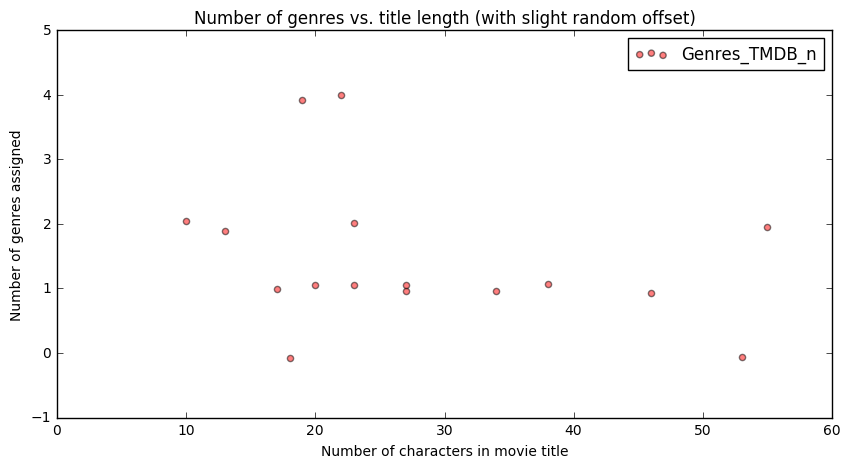

In [85]:
#Visualize our data
genre_compare['Title_length'] = map(lambda x: len(x), genre_compare['Title'])
exists_in_IMDB = np.where(genre_compare['Genres_IMDB_n'] != "NA")[0]
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(1, 1, 1)

# Plot TMDB and IMDB data, with jitter
axes.scatter(genre_compare['Title_length'], genre_compare['Genres_TMDB_n'] + np.random.randn(len(genre_compare['Title_length']))*0.05, c="red", alpha=0.5)
#axes.scatter(genre_compare['Title_length'][exists_in_IMDB], genre_compare['Genres_IMDB_n'][exists_in_IMDB] 
             #+ np.random.randn(len(exists_in_IMDB))*0.05, c="blue", alpha=0.5)

# Add labels and legend
axes.set_title("Number of genres vs. title length (with slight random offset)") 
axes.set_xlabel("Number of characters in movie title")
axes.set_ylabel("Number of genres assigned")
plt.legend()
plt.show()

We do not see a very clear relation between the number of characters in the movie title and the number of genres assign. If anything, there may be a tendency for movies with fewer characters to be assigned more genres, although this does not always hold true. We may hypothesize that large budget movies targeted at a wider audience tend to use shorter titles, while smaller budget movies with less advertising use longer titles as a way to either attract attention or explain the movie a bit more. Larger budget movies may be more likely to be assigned to more than one genre by the database coders since more coders are familiar with the movie and are likely to have an opinion on it.

We also notice that in some cases, both databases assign the same number of genres to a movie, but more frequently they do not.

## Discussion of the problem of multiple genres

### Problem
The number of genres listed per movie is inconsistent, both between movies within the same database (IMDB or TMDB) and between databases for the same movie.

### Discussion
To address this challenge, we first note that the classification assigned by either of these databases is not necessarily correct. For example, TMDB assigns 0 genres to The Happiness Matrix, which does not make sense; it seems better to assign at least one genre (which IMDB does, "Documentary"). In addition, IMDB does not even contain some of the movies in TMDB (or at least, TMDB does not have their IMDB ID). Therefore, although we can assume most of the genres assigned to these movies in the databases are pretty good, there are bound to be some errors, some discrepancies, and especially many subjective classifications that can be debated even among experts. Therefore, it seems that our goal with this project should not be to find the one "right" answer but to come up with a classification that makes intuitive sense and generates fruitful discussion when compared with the database codings.

### Possible approach
- We will be creating a model to predict genre, but it is not necessarily clear if we want the model to predict only one genre or potentially more than one. Regardless, we know that for each movie, we will want to have two types of outcomes: (1) which genre(s) best fit the movie, and (2) how many genres to assign.
- As inputs, we can include predictors from the TMBD data (such as overview, tagline, spoken languages, etc.), the movie poster image, and potentially other plot data from Wikipedia. Like the plot above in part (1d) of this notebook, we can plot the number of genres (and possibly likelihood of a specific genre) against our various possible predictors, exploring the data visually to detect possible patterns.
- Since we are working with a multiclass problem, step (1) seems relatively straightforward; it would make sense to train a separate binary classification model for each class (this is how one vs. the rest SVM performs its classification, anyway). For each potential genre, we will want to generate a separate likelihood that the movie belongs to that class, probably on a continuous scale.
- Step (2) is a bit trickier. We could set the same number of genres to predict, either one or more, and hold this number constant for all movies. This would allow us to simply choose the one or more classes with the highest likelihood and assign those genres. However, this is not consistent with current practice in TMDB and IMDB, and it would make for a less interesting problem than varying the number of genres by movie.
- Alternatively for step (2), we could train a model to assign a number of genres to each movie and then choose the classes with the highest likelihood to fill those genre slots. We may set a possible range for the number of genres, such as 1-5. We may then predict the number of genres for each movie based on title words, title length, budget, poster imagery, and other data. We can additionally include data on correlations between the top genres identifies to predict whether this number of genres makes sense, and we can test whether there is a mismatch between the genres that different inputs would predict (such as title and poster), which may indicate a greater likelihood of a multigenre movie.

### Next steps
As we progress through the project, we will explore these options and others. We will collect the relevant data, clean it, format it into predictors, and implement various models for comparison. Throughout the process, we must keep our desired outcome and audience in mind.

## Additional visualizations and questions
###  Visualizations

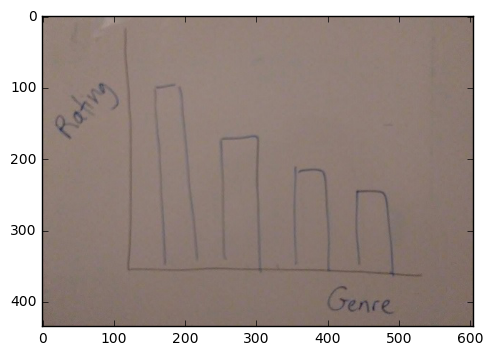

In [69]:
# X-axis genre, Y-axis metric
## Example metrics: Average revenue, average rating, average popularity, frequency
### Average rating by genre
graph = Image.open('avgbygenre.jpg')
imshow(np.asarray(graph))

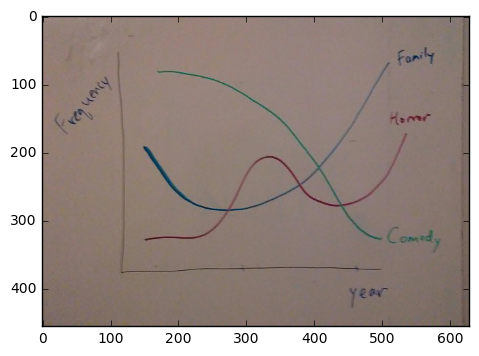

In [70]:
# X-axis year, Y-axis metric, lines for each genre
## Example metrics: Average revenue, average popularity, frequency
### Frequency of each genre over time
graph = Image.open('overtime.jpg')
imshow(np.asarray(graph))

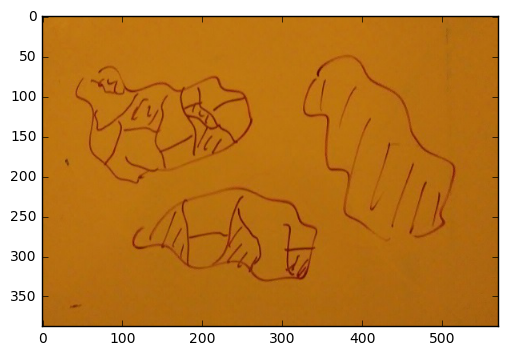

In [71]:
# Map, metric: relative popularity of a genre, most popular genre in that country
graph = Image.open('map.jpg')
imshow(np.asarray(graph))

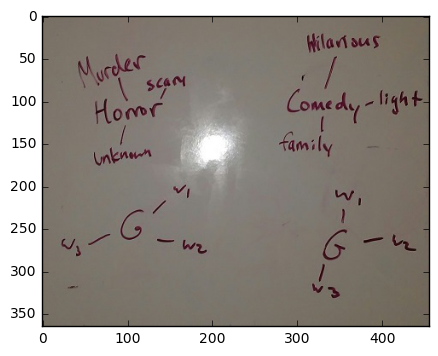

In [72]:
# Most distinctive words in synopses by genre
graph = Image.open('wordcloud.jpg')
imshow(np.asarray(graph))

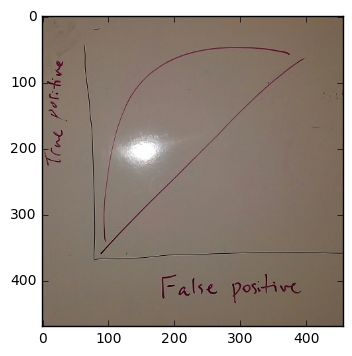

In [3]:
# ROC curve for our model
graph = Image.open('roc.jpg')
imshow(np.asarray(graph))

### Questions
- Is movie budget a good predictor of genre or number of genres?
- What is a good model to predict number of genres and type of genre for movies?
- Compute a versatility index for different actors. Which actors are more versatile?
- What are the "types" of actors based on genres in which they act?
- Which words in synopses are most distinctive for each genre? Will these remain good predictors if you use summaries from different sources?
- Can movie posters (eigenposters) predict movie genres?
- Do our predictors have different predictive effects by country? Should we use a Bayesian hierarchical model?
- When do sequals to better than their originals?
- Which genres have the most international appeal?

### Misc notes
- Author of tmdbsimple has a library with a Rotten Tomatoes Wrapper (Check https://pypi.python.org/pypi/rtsimple). For future data collection.
- Incorporate Wikipedia subgenres
- IMDB and TMDB genre concordance